In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
import numpy as np

In [3]:
data = np.load('cifar-10.npz')

In [4]:
filenames = ["x_train","y_train","x_test","y_test"]
nps = []
for filename in filenames:
    nps.append(data[filename])
train_images,train_labels,test_images,test_labels = nps

#### Shuffling, resizing images

In [5]:
from tensorflow.keras.utils import to_categorical
train_images, test_images = train_images / 255.0, test_images / 255.0
y_train_cat = to_categorical(train_labels,10)
y_test_cat  = to_categorical(test_labels,10)

In [6]:
train_images

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [7]:
import matplotlib.pyplot as plt

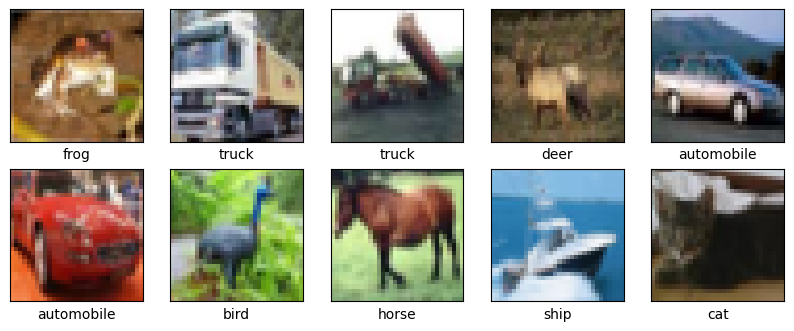

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
 #     plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [12]:
from tensorflow.keras.layers import BatchNormalization, Dropout

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_2 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_3 (Batc  (None, 13, 13, 64)      

In [15]:
# from keras import ImageDataGenerator

ImportError: cannot import name 'ImageDataGenerator' from 'keras' (C:\Users\gauri\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\__init__.py)

In [17]:
model.compile(optimizer='adam',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

# datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True,rotation_range=20)
# it_train = datagen.flow(train_images,y_train_cat)
# steps = int(train_images.shape[0] / 64)
# history=model.fit_generator(it_train,epochs=15,steps_per_epoch=steps,validation_data=(test_images,y_test_cat))

In [18]:
epochs=15 # set this according to your computer
history=model.fit(train_images, y_train_cat,
                  validation_data=(test_images,y_test_cat),epochs=epochs)

Epoch 1/15
1563/1563 [==============================] - 59s 37ms/step - loss: 7.6479 - accuracy: 0.1207 - val_loss: 9.6185 - val_accuracy: 0.1205
Epoch 2/15
1563/1563 [==============================] - 57s 36ms/step - loss: 8.0903 - accuracy: 0.1159 - val_loss: 7.5353 - val_accuracy: 0.1025
Epoch 3/15
1563/1563 [==============================] - 57s 37ms/step - loss: 7.5745 - accuracy: 0.1025 - val_loss: 8.2656 - val_accuracy: 0.1091
Epoch 4/15
1563/1563 [==============================] - 58s 37ms/step - loss: 8.1531 - accuracy: 0.1133 - val_loss: 8.0258 - val_accuracy: 0.1192
Epoch 5/15
1563/1563 [==============================] - 58s 37ms/step - loss: 7.9448 - accuracy: 0.1217 - val_loss: 7.5508 - val_accuracy: 0.1145
Epoch 6/15
1563/1563 [==============================] - 57s 37ms/step - loss: 8.1651 - accuracy: 0.1311 - val_loss: 7.9810 - val_accuracy: 0.1297
Epoch 7/15
1563/1563 [==============================] - 58s 37ms/step - loss: 8.0580 - accuracy: 0.1162 - val_loss: 9.1408 -

In [20]:
test_loss,test_acc = model.evaluate(test_images,y_test_cat)
print("loss %.3f"%test_loss)
print("acc %.3f"%test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 8.0316 - accuracy: 0.0879
loss 8.032
acc 0.088


In [21]:
predicted_values = model.predict(test_images)

313/313 [==============================] - 3s 9ms/step


In [22]:
predicted_values.shape

(10000, 10)

Text(0.5, 1.0, 'frog')

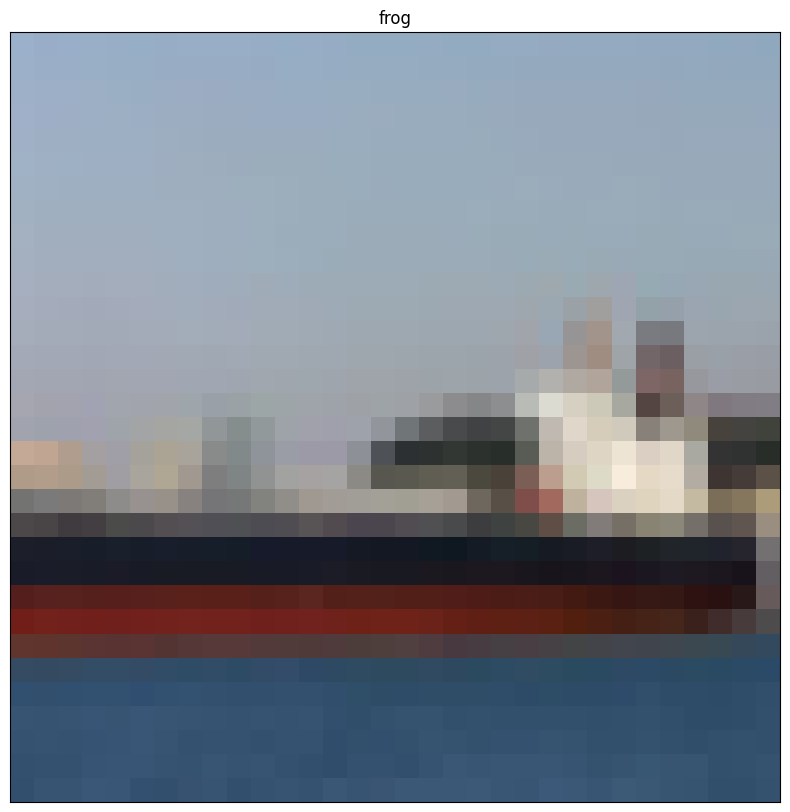

In [23]:
import random
n = random.randint(0,9999)
plt.figure(figsize=(10,10))
plt.imshow(test_images[n])
plt.yticks([])
plt.xticks([])
plt.grid(False)
plt.title(class_names[np.argmax(predicted_values[n])])

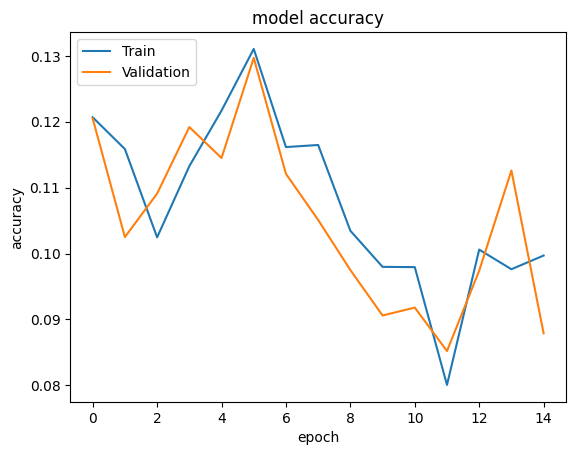

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()